### Superfast task completion for one of my uni subjects
With only 30 minutes to complete, I wrote a function that recommends a destination based on image analysis via Google Api (Visual Cloud). It uses a simple similarity score based on label count comparison. 

note: there were only 15 photos in our team's database, therefore the result might seem poor.

In [1]:
from google.cloud import vision
from google.oauth2 import service_account
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io
import numpy as np

In [2]:
creds = service_account.Credentials.from_service_account_file('XXXXXXXXXXXXXXXXXXXXX.json')
client = vision.ImageAnnotatorClient(credentials=creds)

In [3]:
import os
path = './data/tym2'

def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [4]:
labels_images = {}

In [5]:
directories = os.listdir(path)

for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [6]:
print(labels_images)

{'./data/tym2\\107900.jpg': ['Body of water', 'Vegetation', 'Nature', 'Daytime', 'Atmosphere', 'Water resources', 'Atmospheric phenomenon', 'Ecoregion', 'Watercourse', 'Geological phenomenon'], './data/tym2\\108100.jpg': ['Brown', 'Natural environment', 'Pyramid', 'Landscape', 'Wall', 'Khaki', 'Landmark', 'Ancient history', 'Sand', 'History'], './data/tym2\\108104.jpg': ['Brown', 'Natural environment', 'Landscape', 'Pyramid', 'Khaki', 'Atmospheric phenomenon', 'Landmark', 'Ancient history', 'History', 'Tan'], './data/tym2\\120101.jpg': ['Body of water', 'Nature', 'Natural landscape', 'Water resources', 'Highland', 'Landscape', 'Nature reserve', 'Stream', 'Mountain', 'Formation'], './data/tym2\\124100.jpg': ['Sky', 'Watercraft', 'Cloud', 'Sail', 'Water', 'Mast', 'Boat', 'Sailing', 'Sailboat', 'Liquid'], './data/tym2\\126802.jpg': ['Coastal and oceanic landforms', 'Sunset', 'Sunrise', 'Horizon', 'Dusk', 'Waterway', 'Amber', 'Coast', 'Rock', 'Evening'], './data/tym2\\126808.jpg': ['Coasta

In [7]:
liv = list(labels_images.values())

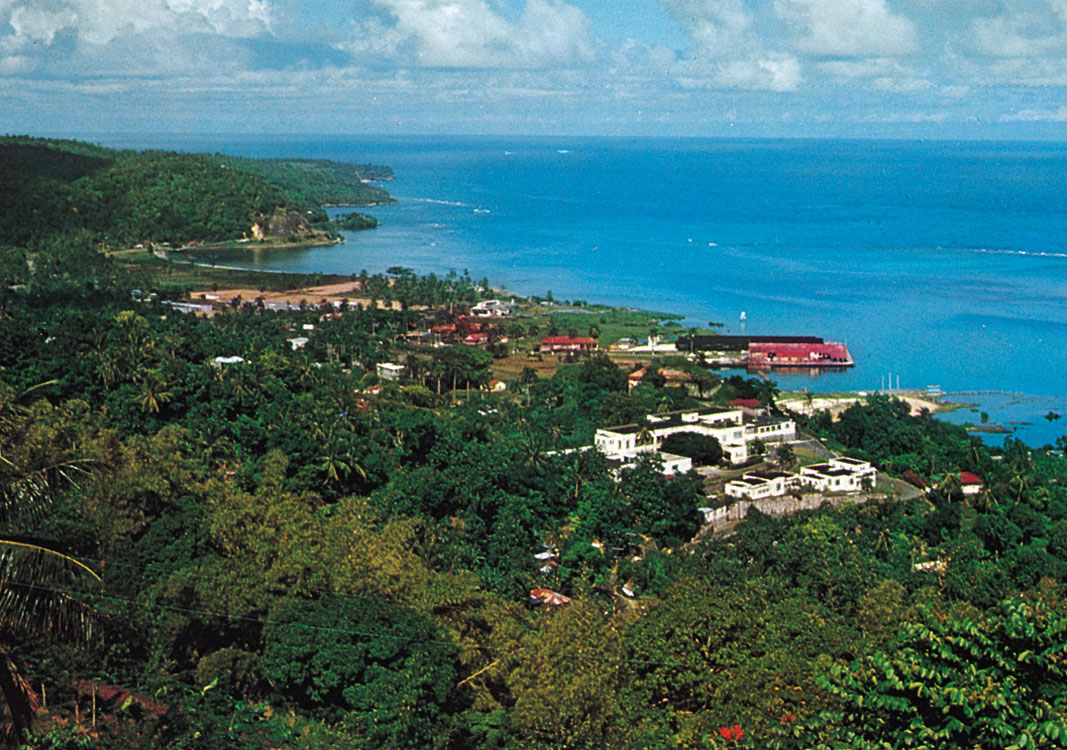

In [8]:
test_pic = './test_pic.jpg'
Image(test_pic)

In [9]:
test_pic = './test_pic.jpg'
def get_recommendation(test_pic=test_pic):
    #get labels from image
    with io.open(test_pic, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    response = client.label_detection(image = image)
    labels = response.label_annotations
    test_pic_labels = []
    for label in labels:
        test_pic_labels.append(label.description)
    #get similarity scores list 
    similarity_scores = []
    for sublist in liv: #labels_images_values_list
        similarity_scores.append(len(set(test_pic_labels)&set(sublist)))
    #find highest score
    ace = np.argmax(similarity_scores)
    #get the key with the ace index
    keylist = list(labels_images.keys())
    
    print('The best destination from our database closest to your photo:')
    return Image(keylist[ace])

The best destination from our database closest to your photo:


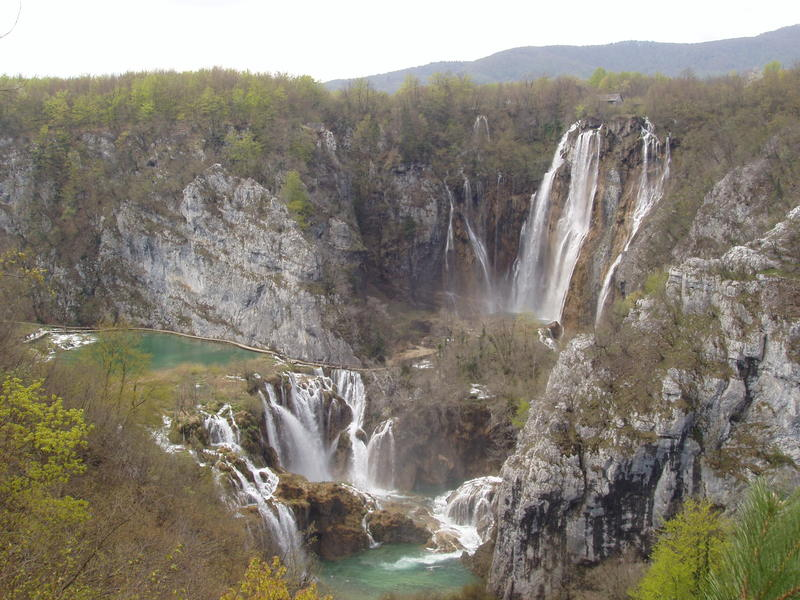

In [10]:
get_recommendation()


It would be nice to have labelled photos in the database to be actually able to name the destination right away.